In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import sklearn
import numpy as np

In [2]:
df = pd.read_csv(r'Data/lyrics_normalized.csv')

In [4]:
df['genre'].value_counts()

Rock             95530
Pop              32584
Metal            19607
Hip-Hop          16199
Country          13607
Not Available    13265
Jazz              6865
Electronic        5413
R&B               3018
Indie             2382
Folk              1516
Other             1409
Name: genre, dtype: int64

In [5]:
#Group the different numeric features by the genre column

In [6]:
genre_word_count_group = df['Unique_Word_Count'].groupby(df['genre'])
genre_polarity_group = df['Sentiment Polarity'].groupby(df['genre'])
genre_ttr_group = df['Type-Token Ratio'].groupby(df['genre'])
genre_word_den_group = df['Word Density'].groupby(df['genre'])

In [12]:
ttr_mean = (genre_ttr_group.describe()['mean'])
polarity_mean = genre_polarity_group.describe()['mean']
word_den_mean = genre_word_den_group.describe()['mean']
wc_mean = genre_word_count_group.describe()['mean']

In [16]:
data = pd.concat([ttr_mean,polarity_mean,word_den_mean,wc_mean],axis = 1)

In [21]:
data_array = data.values

In [27]:
from sklearn.cluster import KMeans

In [25]:
def get_optimal_k(a,b): #Determine cost function(i.e. inertia_ value) for clusters ranging from 2 to 10
    inertia_values = []
    for x in range(a,b+1):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(data) #Train model with specified number of clusters
        inertia_values.append((x,kmeans.inertia_))
    return inertia_values

In [28]:
#Find optimal number of clusters:
cluster_data = []
inertia_values = get_optimal_k(2,10)

In [29]:
vals = sorted(inertia_values,key = lambda x: x[1])

In [31]:
cluster_data.extend(vals)
cluster_wss = [(x,y/x) for (x,y) in cluster_data]
num_of_clusters = [x for (x,y) in cluster_wss]
average_wss =[y for (x,y) in cluster_wss]

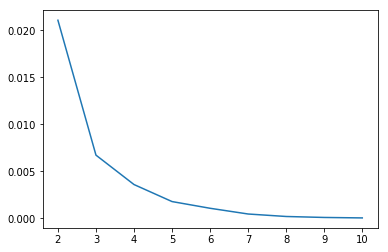

In [32]:
#Elbow method:

plt.plot(num_of_clusters,average_wss)

3 appears to be the ideal number of clusters

In [33]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(data_array)

In [34]:
kmeans.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': 0,
 'copy_x': True,
 'n_jobs': None,
 'algorithm': 'auto',
 'cluster_centers_': array([[0.5251242 , 0.11949048, 0.82266183, 0.69640242],
        [0.51820991, 0.05521354, 0.79538747, 0.36359132],
        [0.62718728, 0.00426582, 0.84457993, 0.69347569]]),
 'labels_': array([0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0]),
 'inertia_': 0.020145154318606123,
 'n_iter_': 2}

Almost all the points fall into one cluster. Thus, k-means clustering of genre level feature data doesnt offer anything useful. Moreover, these are too few data points to apply alternative clustering approaches like DBSCAN